<h1>Carrera de caballos (QC)</h1>
<p>Estamos en un hipódromo donde corren carreras de 5 caballos a la
vez. Cada caballo tiene un nombre y una posición de 1 a 5.
Antes de empezar la carrera se nos pedirá que apostemos por un
caballo.
    
La carrera consiste en correr 700 metros, el primer caballo que corra
esos 700 metros ganará la carrera.
El procedimiento de la carrera será el siguiente:
- La carrera se correrá por tramos, cada pulsación de la tecla
ENTER por parte del usuario será un tramo.
- En cada tramo cada caballo puede correr un número aleatorio
de 50, 60, 70 u 80 metros.
- Cada tramo se retransmitirá al usuario.
- Los caballos tienen una posibilidad de 1/15 de caerse en cada
tramo.
</p>

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

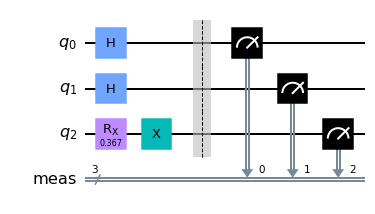

In [2]:
circ = QuantumCircuit(3)
circ.h(range(2))
circ.rx(np.arccos(14/15),2)
circ.x(2)
circ.measure_all()
circ.draw(output = 'mpl')

In [3]:
class Caballo:
    def __init__(self, nombre, dorsal):
        self.nombre = nombre
        self.dorsal = dorsal
        self.distancia = 0
        
    def setDistancia(self,aumento):
        self.distancia = aumento + self.distancia
        
    def toString(self):
        return self.nombre+" con el numero "+str(self.dorsal)+" ("+str(self.distancia)+")"

In [4]:
nombres = ['Estela','Luna','Sidra','Tormenta','Rucio']
dorsales = [1,2,3,4,5]
caballos = []
for i in range(5):
    caballo = Caballo(nombres[i],dorsales[i])
    caballos.append(caballo)

In [5]:
def prob(circ):
    backend = Aer.get_backend("qasm_simulator")
    job = execute(circ, backend, shots = 1) #Solo un shot (quiero solo el valor dado tras la probabilidad)
    data = job.result().get_counts()
    return data

In [6]:
for k in range(5):
    data = prob(circ)
    distancia=0
    for i in data.keys(): #Solo es uno por cada (un solo shot), pero así me permite jugar con la clave (lo importante)
        haCaido = int(i[0:1])
        str_decimal = i[1:3]
        decimal=0
        pos=1
        for j in str_decimal:
            decimal = int(j)*pow(2,pos)+decimal
            pos-=1
        distancia = 10*haCaido*(decimal+5)
        caballos[k].setDistancia(distancia)
        print(caballos[k].toString())

Estela con el numero 1 (60)
Luna con el numero 2 (60)
Sidra con el numero 3 (80)
Tormenta con el numero 4 (80)
Rucio con el numero 5 (50)
